In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/My Drive/pet.zip" "/Mydrive/

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2

In [ ]:
traing_data=[]
datadir ="/content/pet"
categories=["Dog","Cat"]
def create_traing_data():
    for category in categories:
        x=categories.index(category)
        path=os.path.join(datadir,category)
        for img in os.listdir(path):
            try:
                img_data=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_img=cv2.resize(img_data,(80,80))
                traing_data.append([new_img,x])
            except:
                pass



In [ ]:
create_traing_data()

In [ ]:
import random 
random.shuffle(traing_data)

In [ ]:
X=[]
y=[]
for x in traing_data:
  X.append(x[0])
  y.append(x[1])
X=np.array(X)
y=np.array(y)

In [ ]:
X=X.reshape(-1,80,80,1)
X=X/255.0

In [ ]:

from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,Activation
from keras.models import Sequential

Using TensorFlow backend.


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=X.shape[1:],padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3),padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
history=model.fit(X,y,batch_size=64,epochs=2,validation_split=.2)

Train on 19955 samples, validate on 4989 samples
Epoch 1/2
19955/19955 [==============================] - 13s 648us/step - loss: 0.6379 - accuracy: 0.6188 - val_loss: 0.5553 - val_accuracy: 0.7206
Epoch 2/2
19955/19955 [==============================] - 6s 282us/step - loss: 0.5015 - accuracy: 0.7510 - val_loss: 0.4810 - val_accuracy: 0.7717


In [ ]:
history.history

{'accuracy': [0.6188424, 0.75103986],
 'loss': [0.6379250768610363, 0.5014868808222784],
 'val_accuracy': [0.720585286617279, 0.7716977596282959],
 'val_loss': [0.5553014555706675, 0.4810223119677989]}

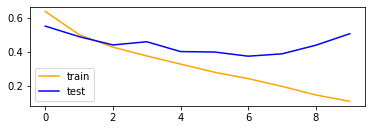

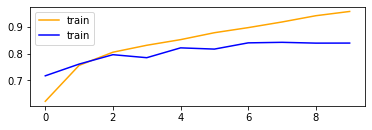

In [ ]:
plt.subplot(211)
plt.plot(history.history["loss"],label="train",color="orange")
plt.plot(history.history["val_loss"],label="test",color="blue")
plt.legend()
plt.show()
plt.subplot(212)
plt.plot(history.history["accuracy"],label="train",color="orange")
plt.plot(history.history["val_accuracy"],label="train",color="blue")
plt.legend()
plt.show()

In [ ]:
##### our model is clearly overfitted

In [ ]:
from keras.callbacks import TensorBoard

In [ ]:
#### lets use dropout and see

In [ ]:
def create_model(): 
    model=Sequential()
    model.add(Conv2D(32,(3,3),input_shape=X.shape[1:],padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(.2))

    model.add(Conv2D(64,(3,3),padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(.3))

    model.add(Conv2D(128,(3,3),padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(.4))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation("relu"))
    model.add(Dropout(.5))

    model.add(Dense(1))
    model.add(Activation("sigmoid"))

    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
    return model

In [ ]:
history=model.fit(X,y,batch_size=64,epochs=10,validation_split=.2)

Train on 19955 samples, validate on 4989 samples
Epoch 1/10
19955/19955 [==============================] - 15s 762us/step - loss: 0.6687 - accuracy: 0.5774 - val_loss: 0.5987 - val_accuracy: 0.6879
Epoch 2/10
19955/19955 [==============================] - 15s 746us/step - loss: 0.5697 - accuracy: 0.7055 - val_loss: 0.5328 - val_accuracy: 0.7334
Epoch 3/10
19955/19955 [==============================] - 15s 754us/step - loss: 0.5204 - accuracy: 0.7411 - val_loss: 0.5202 - val_accuracy: 0.7426
Epoch 4/10
19955/19955 [==============================] - 15s 751us/step - loss: 0.4881 - accuracy: 0.7623 - val_loss: 0.5065 - val_accuracy: 0.7498
Epoch 5/10
19955/19955 [==============================] - 15s 741us/step - loss: 0.4528 - accuracy: 0.7863 - val_loss: 0.4357 - val_accuracy: 0.7974
Epoch 6/10
19955/19955 [==============================] - 15s 748us/step - loss: 0.4264 - accuracy: 0.8032 - val_loss: 0.4468 - val_accuracy: 0.7871
Epoch 7/10
19955/19955 [==============================] -

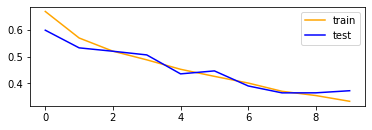

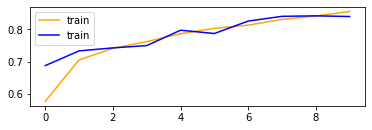

In [ ]:
plt.subplot(211)
plt.plot(history.history["loss"],label="train",color="orange")
plt.plot(history.history["val_loss"],label="test",color="blue")
plt.legend()
plt.show()
plt.subplot(212)
plt.plot(history.history["accuracy"],label="train",color="orange")
plt.plot(history.history["val_accuracy"],label="train",color="blue")
plt.legend()
plt.show()

In [ ]:
### lets use image genertor +dropout together

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, )

In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

In [ ]:
data=datagen.flow(X_train,y_train,batch_size=64)

In [ ]:
model=create_model()

In [ ]:
steps = int(X.shape[0] / 64)
history = model.fit_generator(data, steps_per_epoch=steps, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
389/389 [==============================] - 27s 69ms/step - loss: 0.6829 - accuracy: 0.5681 - val_loss: 0.6386 - val_accuracy: 0.6354
Epoch 2/10
389/389 [==============================] - 26s 66ms/step - loss: 0.6159 - accuracy: 0.6643 - val_loss: 0.5615 - val_accuracy: 0.7142
Epoch 3/10
389/389 [==============================] - 26s 66ms/step - loss: 0.5716 - accuracy: 0.7031 - val_loss: 0.5287 - val_accuracy: 0.7396
Epoch 4/10
389/389 [==============================] - 26s 66ms/step - loss: 0.5243 - accuracy: 0.7384 - val_loss: 0.4705 - val_accuracy: 0.7735
Epoch 5/10
389/389 [==============================] - 26s 66ms/step - loss: 0.4970 - accuracy: 0.7611 - val_loss: 0.4394 - val_accuracy: 0.7887
Epoch 6/10
389/389 [==============================] - 26s 67ms/step - loss: 0.4746 - accuracy: 0.7738 - val_loss: 0.4046 - val_accuracy: 0.8132
Epoch 7/10
389/389 [==============================] - 26s 66ms/step - loss: 0.4490 - accuracy: 0.7892 - val_loss: 0.3884 - val_accuracy:

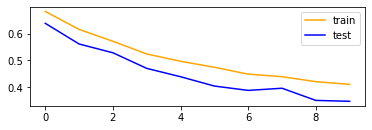

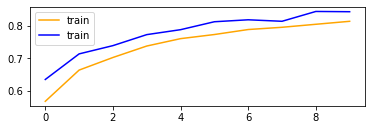

In [ ]:
plt.subplot(211)
plt.plot(history.history["loss"],label="train",color="orange")
plt.plot(history.history["val_loss"],label="test",color="blue")
plt.legend()
plt.show()
plt.subplot(212)
plt.plot(history.history["accuracy"],label="train",color="orange")
plt.plot(history.history["val_accuracy"],label="train",color="blue")
plt.legend()
plt.show()